# Ансамбли моделей

Использование нескольких алгоритмов для решения одной задачи машинного обучения.

Применение: когда лучшая модель найдена и повысить её точность более не получается.

Хорошим примером ансамблей считается теорема Кондорсе «о жюри присяжных» (1784). Если каждый член жюри присяжных имеет независимое мнение, и если вероятность правильного решения члена жюри больше 0.5, то тогда вероятность правильного решения присяжных в целом возрастает с увеличением количества членов жюри и стремится к единице. Если же вероятность быть правым у каждого из членов жюри меньше 0.5, то вероятность принятия правильного решения присяжными в целом монотонно уменьшается и стремится к нулю с увеличением количества присяжных.

# Стекинг

Один из самых популярных способов ансамблирования алгоритмов.
Известно, что если обучить несколько разных алгоритмов, то в задаче регрессии их среднее, а в задаче классификации — голосование по большинству, часто превосходят по качеству все эти алгоритмы. Возникает вопрос: почему, собственно, использовать для ансамблирования такие простые операции как усреднение или голосование? Можно же ансамблироование доверить очередному алгоритму (т.н. «метаалгоритму») машинного обучения.

<img src="https://alexanderdyakonov.files.wordpress.com/2017/03/stacked1.jpg"/>

Простейшая схема стекинга — блендинг (Blending): обучающую выборку делят на две части. На первой обучают базовые алгоритмы. Затем получают их ответы на второй части и на тестовой выборке. Понятно, что  ответ каждого алгоритма можно рассматривать как новый признак (т.н. «метапризнак»). На метапризнаках второй части обучения настраивают метаалгоритм. Затем запускают его на метапризнаках теста и получают ответ.

<img src="https://alexanderdyakonov.files.wordpress.com/2017/03/stacking.png?w=1024"/>

Самый большой недостаток блендинга (в описанной реализации) — деление обучающей выборки. Получается, что ни базовые алгоритмы, ни метаалгоритм не используют всего объёма обучения (каждый — только свой кусочек). Понятно, что для повышения качества надо усреднить несколько блендингов с разными разбиениями обучения. Вместо усреднения иногда конкатенируют обучающие (и тестовые) таблицы для метаалгоритма, полученные при разных разбиениях: здесь мы получаем несколько ответов для каждого объекта тестовой выборки — их усредняют. На практике такая схема блендинга сложнее в реализации и более медленная, а по качеству может не превосходить обычного усреднения.

<img src="https://alexanderdyakonov.files.wordpress.com/2017/03/blending.png?w=1024"/>

Второй способ борьбы за использование всей обучающей выборки — реализация классического стекинга. Совсем не делить обучение на подвыборки (т.е. обучить базовые алгоритмы на всей обучающей выборке и потом для всей выборки построить метапризнаки) нельзя: будет переобучение, поскольку в каждом метапризнаке будет «зашита» информация о значении целевого вектора. Поэтому выборку разбивают на части (фолды), затем последовательно перебирая фолды обучают базовые алгоритмы на всех фолдах, кроме одного, а на оставшемся получают ответы базовых алгоритмов и трактуют их как значения соответствующих признаков на этом фолде. Для получения метапризнаков объектов тестовой выборки базовые алгоритмы обучают на всей обучающей выборке и берут их ответы на тестовой.

<img src="https://alexanderdyakonov.files.wordpress.com/2017/03/stacking-2b.png?w=1024"/>

Здесь тоже желательно реализовывать несколько разных разбиений на фолды и затем усреднить соответствующие метапризнаки. Но самый главный недостаток (классического) стекинга в том, что метапризнаки на обучении (в том числе полноценном) и на тесте разные.

## Стекинг на практике

Стекинг подходит для использования при решении реальных бизнес-задач, поскольку при корректном построении композиции алгоритмов он помогает бороться с типичными проблемами реальных данных. Например, одна из таких проблем — значения признаков появляются в реальном времени и в будущем могут быть артефакты, которые не наблюдались в прошлом. Пример (из личного опыта автора информации  - Александра Дьяконова): «сломались» счётчики посещений интернет-ресурсов и начали показывать аномальные значения (в 100 раз больше истины). Это совершенно губит регрессионные алгоритмы (у них ответы также могут возрасти в 100 раз), но если регрессии использовать как базовые алгоритмы (натренировать на разных признаковых пространствах), а в качестве метаалгоритма использовать что-то основанное на деревьях, то ответ такого стекинга уже не будет совсем неадекватным даже при «повреждении» некоторых признаков.

# Бэггинг

Bagging (от Bootstrap aggregation) — это один из первых и самых простых видов ансамблей. Он был придуман Ле́о Бре́йманом в 1994 году. Бэггинг основан на статистическом методе бутстрэпа, который позволяет оценивать многие статистики сложных распределений.

## Бутстрэп

Метод бутстрэпа заключается в следующем. Пусть имеется выборка $X$ размера $N$. Равномерно возьмем из выборки $N$ объектов с возвращением. Это означает, что мы будем $N$ раз выбирать произвольный объект выборки (считаем, что каждый объект «достается» с одинаковой вероятностью ${1\over N}$), причем каждый раз мы выбираем из всех исходных $N$ объектов. Можно представить себе мешок, из которого достают шарики: выбранный на каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять делается равновероятно из того же числа шариков. Отметим, что из-за возвращения среди них окажутся повторы. Обозначим новую выборку через $X_1$. Повторяя процедуру $M$ раз, сгенерируем $M$ подвыборок $X_1,…,X_M$. Теперь мы имеем достаточно большое число выборок и можем оценивать различные статистики исходного распределения.

<img src="https://habrastorage.org/getpro/habr/post_images/198/14a/3f7/19814a3f7efaa3b7d1a3f8ab35889832.jpg"/>

Давайте для примера возьмем набор данных telecom_churn. Это задача бинарной классификации оттока клиентов. Одним из самых важных признаков в этом датасете является количество звонков в сервисный центр, которые были сделаны клиентом. Давайте попробуем визулизировать данные и посмотреть на распределение данного признака.

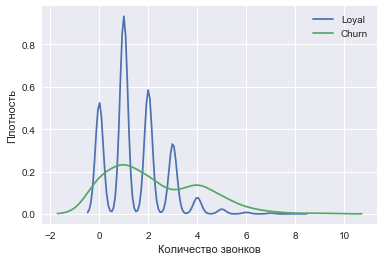

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6

%matplotlib inline

telecom_data = pd.read_csv('../../data/telecom_churn.csv')

fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == False]['Customer service calls'], label = 'Loyal')
fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == True]['Customer service calls'], label = 'Churn')        
fig.set(xlabel='Количество звонков', ylabel='Плотность')
plt.show()

Количество звонков в сервисный центр у лояльных клиентов меньше, чем у наших бывших клиентов. Теперь было бы хорошо оценить, сколько в среднем делает звонков каждая из групп. Так как данных в нашем датасете мало, то искать среднее не совсем правильно, лучше применить наши новые знания бутстрэпа. Давайте сгенерируем 1000 новых подвыборок из нашей генеральной совокупности и сделаем интервальную оценку среднего.


In [2]:
import numpy as np
def get_bootstrap_samples(data, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    # функция для интервальной оценки
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# сохранение в отдельные numpy массивы данных по лояльным и уже бывшим клиентам
loyal_calls = telecom_data[telecom_data['Churn'] == False]['Customer service calls'].values
churn_calls= telecom_data[telecom_data['Churn'] == True]['Customer service calls'].values

# ставим seed для воспроизводимости результатов
np.random.seed(0)

# генерируем выборки с помощью бутстрэра и сразу считаем по каждой из них среднее
loyal_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(loyal_calls, 1000)]
churn_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(churn_calls, 1000)]

#  выводим интервальную оценку среднего
print("Service calls from loyal:  mean interval",  stat_intervals(loyal_mean_scores, 0.05))
print("Service calls from churn:  mean interval",  stat_intervals(churn_mean_scores, 0.05))

Service calls from loyal:  mean interval [ 1.4077193   1.49473684]
Service calls from churn:  mean interval [ 2.0621118   2.39761905]


В итоге получаем, что с 95% вероятностью среднее число звонков от лояльных клиентов будет лежать в промежутке между 1.40 и 1.50, в то время как наши бывшие клиенты звонили в среднем от 2.06 до 2.40 раз. Также ещё можно обратить внимание, что интервал для лояльных клиентов уже, что довольно логично, так как они звонят редко (в основном 0, 1 или 2 раза), а недовольные клиенты будут звонить намного чаще, но со временем их терпение закончится, и они поменяют оператора.

## Бэггинг

Теперь имея представление о бустрэпе, и можно перейти непосредственно к бэггингу. Пусть имеется обучающая выборка X. С помощью бутстрэпа сгенерируем из неё выборки $X_1,…,X_M$. Теперь на каждой выборке обучим свой классификатор $a_i(x)$. Итоговый классификатор будет усреднять ответы всех этих алгоритмов (в случае классификации это соответствует голосованию): $a(x) = \frac{1}{M}\sum_{i = 1}^M a_i(x)$. Эту схему можно представить картинкой ниже.

<img src="https://hsto.org/getpro/habr/post_images/d2d/b63/6ff/d2db636ff7c5a59f18858bb93f4323db.png"/>

Бэггинг позволяет снизить дисперсию (variance) обучаемого классификатора, уменьшая величину, на сколько ошибка будет отличаться, если обучать модель на разных наборах данных, или другими словами, предотвращает переобучение. Эффективность бэггинга достигается благодаря тому, что базовые алгоритмы, обученные по различным подвыборкам, получаются достаточно различными, и их ошибки взаимно компенсируются при голосовании, а также за счёт того, что объекты-выбросы могут не попадать в некоторые обучающие подвыборки.

В библиотеке scikit-learn есть реализации BaggingRegressor и BaggingClassifier, которые позволяют использовать большинство других алгоритмов "внутри". Рассмотрим на практике, как работает бэггинг, и сравним его с деревом решений, пользуясь примером из [документации](http://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py).

<img src="https://habrastorage.org/getpro/habr/post_images/477/c24/f27/477c24f272b3312419b1865702a51034.png"/>

Ошибка дерева решений

$0.0255(Err)=0.0003(Bias2)+0.0152(Var)+0.0098(σ2)$

Ошибка бэггинга

$0.0196(Err)=0.0004(Bias2)+0.0092(Var)+0.0098(σ2)$

По графику и результатам выше видно, что ошибка дисперсии намного меньше при бэггинге, как мы и доказали теоретически выше.

Бэггинг эффективен на малых выборках, когда исключение даже малой части обучающих объектов приводит к построению существенно различных базовых классификаторов. В случае больших выборок обычно генерируют подвыборки существенно меньшей длины.


# Случайный лес

Лео Брейман нашел применение бутстрэпу не только в статистике, но и в машинном обучении. Он вместе с Адель Катлер усовершенстовал алгоритм случайного леса, предложенный Хо, добавив к первоначальному варианту построение некоррелируемых деревьев на основе [CART](https://goo.gl/o38ZJT), в сочетании с методом случайных подпространств и бэггинга.

Решающие деревья являются хорошим семейством базовых классификаторов для бэггинга, поскольку они достаточно сложны и могут достигать нулевой ошибки на любой выборке. Метод случайных подпространств позволяет снизить коррелированность между деревьями и избежать переобучения. Базовые алгоритмы обучаются на различных подмножествах признакового описания, которые также выделяются случайным образом.
Ансамбль моделей, использующих метод случайного подпространства, можно построить, используя следующий алгоритм:

1. Пусть количество объектов для обучения равно $N$, а количество признаков $D$.
2. Выберите $L$ как число отдельных моделей в ансамбле.
3. Для каждой отдельной модели $l$ выберите $dl(dl<D)$ как число признаков для $l$. Обычно для всех моделей используется только одно значение $dl$.
4. Для каждой отдельной модели $l$ создайте обучающую выборку, выбрав $dl$ признаков из $D$, и обучите модель.
5. Теперь, чтобы применить модель ансамбля к новому объекту, объедините результаты отдельных $L$ моделей мажоритарным голосованием или путем комбинирования апостериорных вероятностей.

Алгоритм построения случайного леса, состоящего из $N$ деревьев, выглядит следующим образом:

Для каждого $n=1,…,N$:
Сгенерировать выборку $X_n$ с помощью бутстрэпа;
Построить решающее дерево $b_n$ по выборке $X_n$:

— по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки

— дерево строится, пока в каждом листе не более $n_{min}$ объектов или пока не достигнем определенной высоты дерева

— при каждом разбиении сначала выбирается $m$ случайных признаков из $n$ исходных,
и оптимальное разделение выборки ищется только среди них.

Итоговый классификатор $a(x)=\frac{1}{N}\sum_{i = 1}^Nb_i(x)$, простыми словами — для задачи кассификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.

Рекомендуется в задачах классификации брать $m=\sqrt{n}$, а в задачах регрессии — $m = {n\over3}$, где $n$ — число признаков. Также рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов.

Таким образом, случайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

## Сравнение с деревом решений и бэггингом

Populating the interactive namespace from numpy and matplotlib


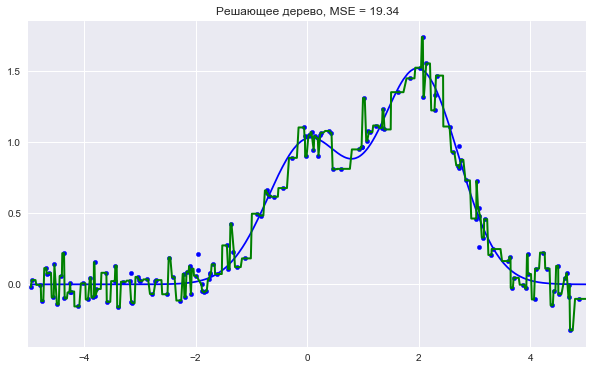

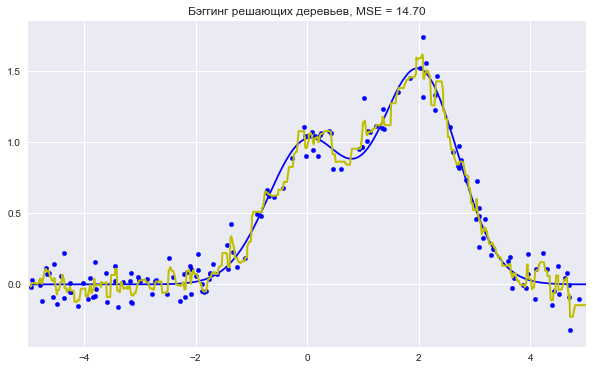

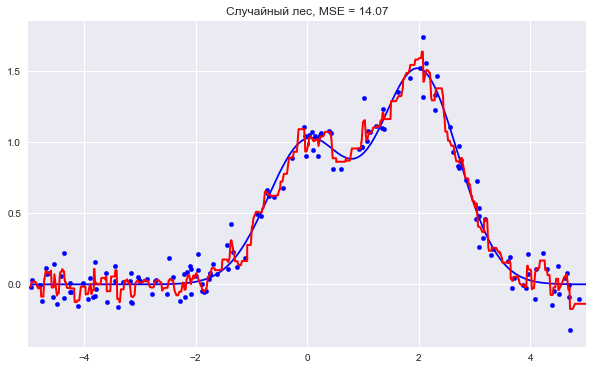

In [3]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
np.random.seed(42)
figsize(8, 6)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

# One decision tree regressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Решающее дерево, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

# Bagging decision tree regressor
bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Бэггинг решающих деревьев, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

# Random Forest
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Случайный лес, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

Как мы видим из графиков и значений ошибки MSE, случайный лес из 10 деревьев дает лучший результат, чем одно дерево или бэггинг из 10 деревьев решений. Основное различие случайного леса и бэггинга на деревьях решений заключается в том, что в случайном лесе выбирается случайное подмножество признаков, и лучший признак для разделения узла определяется из подвыборки признаков, в отличие от бэггинга, где все функции рассматриваются для разделения в узле.

Также можно увидеть преимущество случайного леса и бэггинга в задачах классификации.

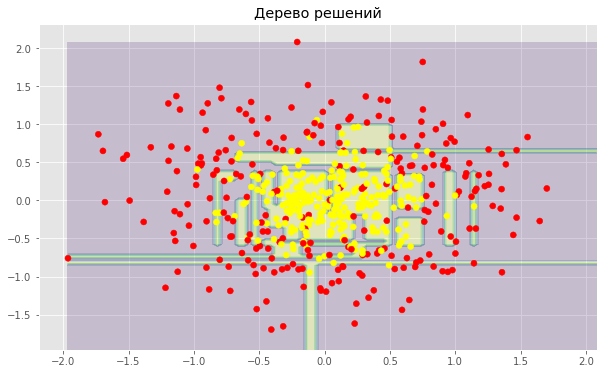

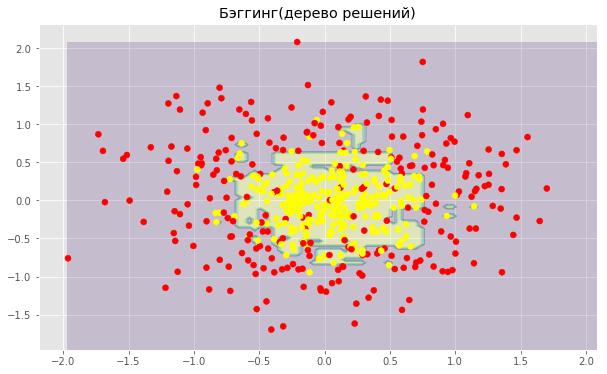

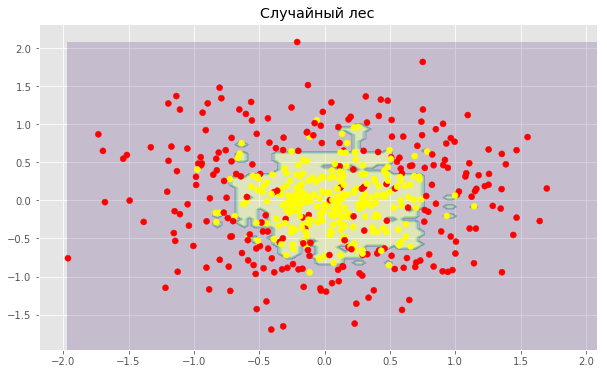

In [4]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection  import train_test_split
plt.rcParams['figure.figsize'] = 10, 6

np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Дерево решений")
plt.show()

b_dtree = BaggingClassifier(DecisionTreeClassifier(),n_estimators=300, random_state=42)
b_dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Бэггинг(дерево решений)")
plt.show()

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Случайный лес")
plt.show()

На рисунках выше видно, что разделяющая граница дерева решений очень «рваная» и на ней много острых углов, что говорит о переобучении и слабой обобщающей способности. В то время как у бэггинга и случайного леса граница достаточно сглаженная и практически нет признаков переобучения.

## Параметры

Метод случайного леса реализован в библиотеке машинного обучения scikit-learn двумя классами RandomForestClassifier и RandomForestRegressor.

Полный список параметров случайного леса для задачи регрессии:

class sklearn.ensemble.RandomForestRegressor(

    n_estimators — число деревьев в "лесу" (по дефолту – 10)
    
    criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")
    
    max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".
    
    max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)
    
    min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)
    
    min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)
    
    min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес)
    
    max_leaf_nodes — максимальное количество листьев (по дефолту нет ограничения)
    
    min_impurity_split — порог для остановки наращивания дерева (по дефолту 1е-7)
    
    bootstrap — применять ли бустрэп для построения дерева (по дефолту True)
    
    oob_score — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False)
    
    n_jobs — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
    
    random_state — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int
    
    verbose — вывод логов по построению деревьев (по дефолту 0)
    
    warm_start — использует уже натренированую модель и добавляет деревьев в ансамбль (по дефолту False)
)

Для задачи классификации все почти то же самое, мы приведем только те параметры, которыми RandomForestClassifier отличается от RandomForestRegressor

    criterion — поскольку у нас теперь задача классификации, то по дефолту выбран критерий "gini" (можно выбрать "entropy")
    
    class_weight — вес каждого класса (по дефолту все веса равны 1, но можно передать словарь с весами, либо явно указать "balanced", тогда веса классов будут равны их исходным частям в генеральной совокупности; также можно указать "balanced_subsample", тогда веса на каждой подвыборке будут меняться в зависимости от распределения классов на этой подвыборке.
)

Далее рассмотрим несколько параметров, на которые в первую очередь стоит обратить внимание при построении модели:

n_estimators — число деревьев в "лесу"

criterion — критерий для разбиения выборки в вершине

max_features — число признаков, по которым ищется разбиение

min_samples_leaf — минимальное число объектов в листе

max_depth — максимальная глубина дерева

## Применение случайного леса в реальной задаче

Для этого будем использовать пример с задачей оттока клиентов. Это задача классификации, поэтому будем использовать метрику accuracy для оценки качества модели. Для начала построим самый простой классификатор, который будет нашим бейслайном. Возьмем только числовые признаки для упрощения.

In [5]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

# Загружаем данные
df = pd.read_csv("../../data/telecom_churn.csv")

# Выбираем сначала только колонки с числовым типом данных
cols = []
for i in df.columns:
    if (df[i].dtype == "float64") or (df[i].dtype == 'int64'):
        cols.append(i)

# Разделяем на признаки и объекты
X, y = df[cols].copy(), np.asarray(df["Churn"],dtype='int8')

# Инициализируем страифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

# Обучаем на тренировочном датасете
results = cross_val_score(rfc, X, y, cv=skf)

# Оцениваем долю верных ответов на тестовом датасете
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 91.48%


Получили долю верных ответов 91.21%, теперь попробуем улучшить этот результат и посмотреть, как ведут себя кривые валидации при изменении основных параметров.

Начнем с количества деревьев:

In [6]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.44% with 50 trees


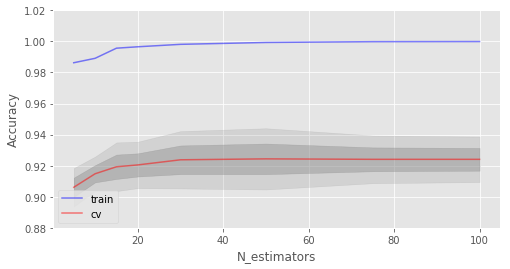

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

Как видно, при достижении определенного числа деревьев наша долья верных ответов на тесте выходит на асимптоту, и вы можете сами решить, сколько деревьев оптимально для вашей задачи.
На рисунке также видно, что на тренировочной выборке мы смогли достичь 100% точности, это говорит нам о переобучении нашей модели. Чтобы избежать переобучения, мы должны добавить параметры регуляризации в модель.

Начнем с параметра максимальной глубины – max_depth. (зафиксируем к-во деревьев 100)

In [8]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.68% with 17 max_depth


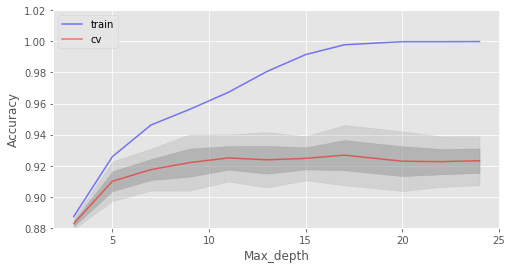

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

Параметр max_depth хорошо справляется с регуляризацией модели, и мы уже не так сильно переобучаемся. Долья верных ответов нашей модели немного возросла.

Еще важный параметр min_samples_leaf, он также выполняет функцию регуляризатора.

In [10]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.41% with 3 min_samples_leaf


In [11]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))])) 

Best accuracy on CV is 92.41% with 3 min_samples_leaf


In [12]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.41% with 3 min_samples_leaf


В данном случае мы не выигрываем в точности на валидации, но зато можем сильно уменьшить переобучение до 2% при сохранении точности около 92%.

Рассмотрим такой параметр как max_features. Для задач классификации по умолчанию используется $n$, где $n$ — число признаков. Давайте проверим, оптимально ли в нашем случае использовать 4 признака или нет.

In [13]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.59% with 12 max_features


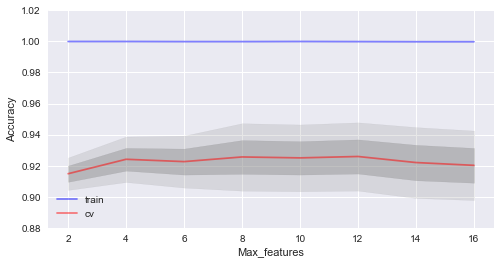

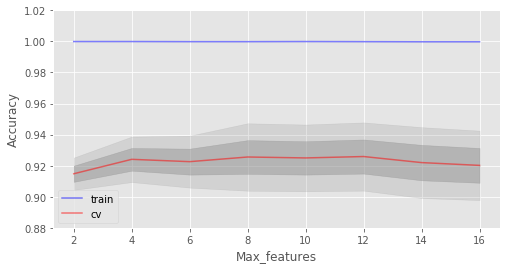

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

В нашем случае оптимальное число признаков — 10, именно с таким значением достигается наилучший результат.

Мы рассмотрели, как ведут себя кривые валидации в зависимости от изменения основных параметров. Давайте теперь с помощью GridSearchCV найдем оптимальные параметры для нашего примера.

In [15]:
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

Лучшая доля верных ответов, который мы смогли достичь с помощью перебора параметров — 92.83% при 

'max_depth': 15, 

'max_features': 7, 

'min_samples_leaf': 3.

# Плюсы и минусы случайного леса

Плюсы:
— имеет высокую точность предсказания, на большинстве задач будет лучше линейных алгоритмов; точность сравнима с точностью бустинга

— практически не чувствителен к выбросам в данных из-за случайного сэмлирования

— не чувствителен к масштабированию (и вообще к любым монотонным преобразованиям) значений признаков, связано с выбором случайных подпространств

— не требует тщательной настройки параметров, хорошо работает «из коробки». С помощью «тюнинга» параметров можно достичь прироста от 0.5 до 3% точности в зависимости от задачи и данных

— способен эффективно обрабатывать данные с большим числом признаков и классов

— одинаково хорошо обрабатывет как непрерывные, так и дискретные признаки

— редко переобучается, на практике добавление деревьев почти всегда только улучшает композицию, но на валидации, после достижения определенного количества деревьев, кривая обучения выходит на асимптоту

— для случайного леса существуют методы оценивания значимости отдельных признаков в модели

— хорошо работает с пропущенными данными; сохраняет хорошую точность, если большая часть данных пропущенна

— предполагает возможность сбалансировать вес каждого класса на всей выборке, либо на подвыборке каждого дерева

— вычисляет близость между парами объектов, которые могут использоваться при кластеризации, обнаружении выбросов или (путем масштабирования) дают интересные представления данных

— возможности, описанные выше, могут быть расширены до неразмеченных данных, что приводит к возможности делать кластеризацию и визуализацию данных, обнаруживать выбросы

— высокая параллелизуемость и масштабируемость.

Минусы:
— в отличие от одного дерева, результаты случайного леса сложнее интерпретировать

— нет формальных выводов (p-values), доступных для оценки важности переменных

— алгоритм работает хуже многих линейных методов, когда в выборке очень много разреженных признаков (тексты, Bag of words)

— случайный лес не умеет экстраполировать, в отличие от той же линейной регрессии (но это можно считать и плюсом, так как не будет экстремальных значений в случае попадания выброса)

— алгоритм склонен к переобучению на некоторых задачах, особенно на зашумленных данных

— для данных, включающих категориальные переменные с различным количеством уровней, случайные леса предвзяты в пользу признаков с большим количеством уровней: когда у признака много уровней, дерево будет сильнее подстраиваться именно под эти признаки, так как на них можно получить более высокое значение оптимизируемого функционала (типа прироста информации)

— если данные содержат группы коррелированных признаков, имеющих схожую значимость для меток, то предпочтение отдается небольшим группам перед большими

— больший размер получающихся моделей. Требуется $O(NK)$ памяти для хранения модели, где $K$ — число деревьев.

# Источники
- [Открытый курс машинного обучения. Тема 5. Композиции: бэггинг, случайный лес](https://habrahabr.ru/company/ods/blog/324402/)
- [Cтекинг (Stacking) и блендинг (Blending) "КвазиНаучный блог Александра Дьяконова"](https://alexanderdyakonov.wordpress.com/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/)
- http://www.levvu.narod.ru/Machine_Learning_LTU_7.pdf